In [3]:
import json 
import numpy as np
import matplotlib.pyplot as plt
import glob 
from dataclasses import dataclass
import pandas as pd


In [14]:
@dataclass 
class ModelGeneration:
    model_path: str 
    question_num: int
    sample_num: int
    generation: str 
    correctness: bool


def load_generations(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)

    return ModelGeneration(
        model_path=file_path.split('/')[-2],
        question_num=data['question_id'],
        sample_num=data['sample_index'],
        generation=data['converted_text'],
        correctness=data['correctness'],
        # embedding=data['generated_embedding']
    )

model_names = ['taco_instruct_llama_8b_single', 'taco_instruct_llama_8b_single_slerp_0.7', 'taco_instruct_llama_8b_single_slerp_0.5','taco_instruct_llama_8b_single_slerp_0.90']# 'taco_instruct_llama_8b_single_slerp_0.90']
generations = []

for model_name in model_names:
    model_path = f"/scratch/gpfs/vv7118/projects/messi-thinking/embeddings/{model_name}"
    model_files = glob.glob(f"{model_path}/converted_*.json")
    for file_path in model_files:
        try: 
            generations.append(load_generations(file_path))
        except Exception as e:
            print(f"Error loading file {file_path}: {e}")
            # raise e



Error loading file /scratch/gpfs/vv7118/projects/messi-thinking/embeddings/taco_instruct_llama_8b_single_slerp_0.5/converted_question_996_sample_8_with_embeddings.json: 'correctness'
Error loading file /scratch/gpfs/vv7118/projects/messi-thinking/embeddings/taco_instruct_llama_8b_single_slerp_0.5/converted_question_997_sample_8_with_embeddings.json: 'correctness'
Error loading file /scratch/gpfs/vv7118/projects/messi-thinking/embeddings/taco_instruct_llama_8b_single_slerp_0.5/converted_question_999_sample_5_with_embeddings.json: 'correctness'
Error loading file /scratch/gpfs/vv7118/projects/messi-thinking/embeddings/taco_instruct_llama_8b_single_slerp_0.5/converted_question_994_sample_2_with_embeddings.json: 'correctness'
Error loading file /scratch/gpfs/vv7118/projects/messi-thinking/embeddings/taco_instruct_llama_8b_single_slerp_0.5/converted_question_999_sample_6_with_embeddings.json: 'correctness'
Error loading file /scratch/gpfs/vv7118/projects/messi-thinking/embeddings/taco_instr

In [28]:
df

,model_path,question_num,sample_num,generation,correctness
0,taco_instruct_llama_8b_single,838,1,"<|begin_of_thought|>\nOkay, so I need to solve...",False
1,taco_instruct_llama_8b_single,787,8,"<|begin_of_thought|>\n\nOkay, so I've got this...",False
2,taco_instruct_llama_8b_single,85,0,"<|begin_of_thought|>\nOkay, I need to write a ...",True
3,taco_instruct_llama_8b_single,766,3,"<|begin_of_thought|>\nOkay, I need to solve th...",True
4,taco_instruct_llama_8b_single,9,9,"<|begin_of_thought|>\n\nOkay, so I have this p...",False
...,...,...,...,...,...
37856,taco_instruct_llama_8b_single_slerp_0.90,94,2,"<|begin_of_thought|>\nAlright, let's tackle th...",False
37857,taco_instruct_llama_8b_single_slerp_0.90,225,9,"<|begin_of_thought|>\n\nAlright, I need to sol...",False
37859,taco_instruct_llama_8b_single_slerp_0.90,178,7,"<|begin_of_thought|> \n\nAlright, let's tackle...",False
37860,taco_instruct_llama_8b_single_slerp_0.90,760,9,"<|begin_of_thought|>\nOkay, I need to solve th...",False


In [36]:
df = pd.DataFrame(generations)

In [37]:
df = df[df['question_num'] < 500]

In [23]:
temp = df[df['model_path'] == 'taco_instruct_llama_8b_single']['question_num'].unique()
df = df[df['question_num'].isin(temp)]

In [16]:
any_df = df.groupby(['model_path','question_num']).correctness.max().reset_index()

In [24]:
name_mapping = {
    "taco_instruct_llama_8b_single": r"$\alpha=1$",
    "taco_instruct_llama_8b_single_slerp_0.90": r"$\alpha=0.9$",
    "taco_instruct_llama_8b_single_slerp_0.7": r"$\alpha=0.7$",
    "taco_instruct_llama_8b_single_slerp_0.5": r"$\alpha=0.5$",
}

Error getting SE for 8: single positional indexer is out-of-bounds
Error getting SE for 9: single positional indexer is out-of-bounds


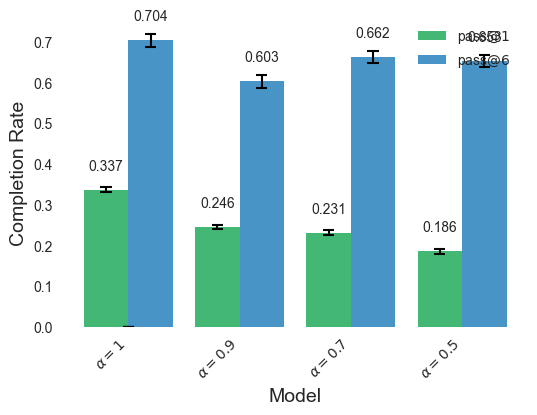

In [32]:
import seaborn as sns

# Set the style and LaTeX rendering
plt.style.use('seaborn-v0_8')
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
# })

# Create figure with larger size
plt.figure(figsize=(6, 4))


model_order = [r"$\alpha=1$", r"$\alpha=0.9$", r"$\alpha=0.7$", r"$\alpha=0.5$"]

# Calculate means and standard deviations with standard error
stats_df = df.groupby('model_path')['correctness'].agg(['mean', 'std', 'count'])
stats_any_df = any_df.groupby('model_path')['correctness'].agg(['mean', 'std', 'count'])

# Calculate standard error
stats_df['se'] = stats_df['std'] / np.sqrt(stats_df['count'])
stats_any_df['se'] = stats_any_df['std'] / np.sqrt(stats_any_df['count'])

# Create a new dataframe for plotting
plot_data = pd.DataFrame({
    'Model': [name_mapping.get(model, model) for model in stats_df.index] + 
            [name_mapping.get(model, model) for model in stats_any_df.index],
    'Correctness': list(stats_df['mean']) + list(stats_any_df['mean']),
    'SE': list(stats_df['se']) + list(stats_any_df['se']),
    'Type': ['pass$@1$']*len(stats_df) + ['pass$@6$']*len(stats_any_df)
})

# Create the grouped bar plot
ax = sns.barplot(
    data=plot_data,
    x='Model', 
    y='Correctness',
    hue='Type',
    palette=['#2ecc71', '#3498db'],
    order=model_order,
    errorbar=None,  # Disable seaborn's built-in error bars
)

# Add custom error bars
for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    try: 
        se = plot_data.iloc[i]['SE']
    except Exception as e: 
        print(f"Error getting SE for {i}: {e}")
        se = 0
    ax.vlines(x, y-se, y+se, color='black', linewidth=1.5)
    ax.hlines(y+se, x-0.05, x+0.05, color='black', linewidth=1.5)  # Top cap
    ax.hlines(y-se, x-0.05, x+0.05, color='black', linewidth=1.5)  # Bottom cap

ax.grid(False)
ax.set_facecolor('white')

# Customize the plot
plt.xlabel('Model', fontsize=14)
plt.ylabel('Completion Rate', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in ax.containers:
    if type(container).__name__ == 'BarContainer':  # Only label the bars
        ax.bar_label(container, fmt='%.3f', padding=12)

# Adjust legend
plt.legend(bbox_to_anchor=(0.99, 1.01), loc='upper right')

# # Adjust layout to prevent label cutoff
# plt.tight_layout()

# Save and show the plot
plt.savefig('correctness_plot.pdf', bbox_inches='tight')
plt.show()

In [33]:
df.groupby(['model_path'])['question_num'].nunique()

model_path
taco_instruct_llama_8b_single               500
taco_instruct_llama_8b_single_slerp_0.5     500
taco_instruct_llama_8b_single_slerp_0.7     500
taco_instruct_llama_8b_single_slerp_0.90    500
Name: question_num, dtype: int64

In [34]:
# Get all question numbers for each model
model_questions = df.groupby('model_path')['question_num'].unique()

# Create set of all numbers 0-999
all_nums = set(range(1000))

# Find missing numbers for each model
for model in df['model_path'].unique():
    model_nums = set(model_questions[model])
    missing = sorted(all_nums - model_nums)
    print(f"\n{model}:")
    print(f"Missing {len(missing)} questions:")
    print(missing)



taco_instruct_llama_8b_single:
Missing 500 questions:
[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,

In [39]:
df = df[df['sample_num'] < 6]

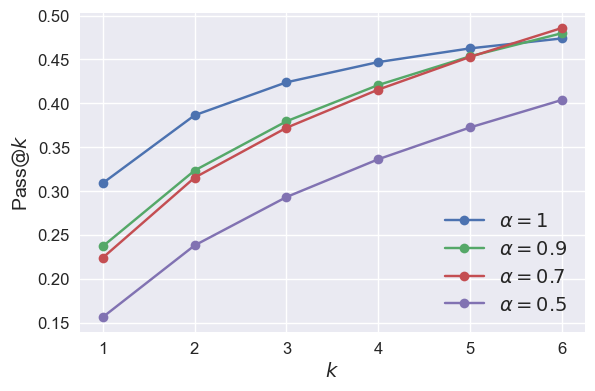

In [40]:
def calculate_pass_at_k(generations_df, model_name, k_values):
    """Calculate pass@k for a specific model using the estimator."""
    # Group by question_num to get all attempts and correct counts for each question
    grouped = generations_df[generations_df['model_path'] == model_name].groupby('question_num')
    
    pass_at_k = []
    for k in k_values:
        # For each question, get total samples and number of correct solutions
        stats = grouped.agg({
            'sample_num': 'count',  # Total samples per question
            'correctness': 'sum'    # Number of correct solutions per question
        })
        # Estimate pass@k using the estimator function
        estimates = estimate_pass_at_k(stats['sample_num'].values, stats['correctness'].values, k)
        pass_rate = estimates.mean()  # Average across all questions
        pass_at_k.append(pass_rate)
    
    return pass_at_k

import itertools
def estimate_pass_at_k(num_samples, num_correct, k):
    """Estimates pass@k of each problem and returns them in an array."""

    def estimator(n: int, c: int, k: int) -> float:
        """Calculates 1 - comb(n - c, k) / comb(n, k)."""
        if n - c < k:
            return 1.0
        return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

    if isinstance(num_samples, int):
        num_samples_it = itertools.repeat(num_samples, len(num_correct))
    else:
        assert len(num_samples) == len(num_correct)
        num_samples_it = iter(num_samples)

    return np.array([estimator(int(n), int(c), k) for n, c in zip(num_samples_it, num_correct)])

# Define k values to evaluate
k_values = range(1, df.groupby('question_num')['sample_num'].nunique().min() + 1)

# Plot settings
plt.figure(figsize=(6, 4))
sorted_models = sorted(df['model_path'].unique(), key=lambda x: name_mapping.get(x, x), reverse=True)

# Calculate and plot pass@k for each model
for model_name in sorted_models:
    pass_rates = calculate_pass_at_k(df, model_name, k_values)
    plt.plot(k_values, pass_rates, marker='o', label=name_mapping.get(model_name, model_name))

plt.xlabel('$k$', fontsize=14)
plt.ylabel('Pass$@k$', fontsize=14)
# plt.title('Pass@k for Different Models')
plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()
# remove spines 
plt.tick_params(axis='both', which='both', labelsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.savefig('pass_at_k.pdf', bbox_inches='tight', dpi=300)
plt.show()

